# Imports

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Criação do dataset list e labels

In [57]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

## Transformando o list em array

In [58]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Separando o train e test data set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Transformar em variáveis 

In [60]:
y_train = to_categorical(y_train, 43)

y_test = to_categorical(y_test, 43)

## Construindo os modelos

In [61]:
model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = (30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Treinamento do bot

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
981/981 [==============================] - 45s 45ms/step - loss: 1.9684 - accuracy: 0.5011 - val_loss: 0.3995 - val_accuracy: 0.9016
Epoch 2/20
981/981 [==============================] - 46s 47ms/step - loss: 0.6407 - accuracy: 0.8138 - val_loss: 0.1716 - val_accuracy: 0.9593
Epoch 3/20
981/981 [==============================] - 46s 47ms/step - loss: 0.3854 - accuracy: 0.8867 - val_loss: 0.0958 - val_accuracy: 0.9736
Epoch 4/20
981/981 [==============================] - 46s 47ms/step - loss: 0.3183 - accuracy: 0.9097 - val_loss: 0.2320 - val_accuracy: 0.9353
Epoch 5/20
981/981 [==============================] - 46s 47ms/step - loss: 0.2752 - accuracy: 0.9234 - val_loss: 0.0767 - val_accuracy: 0.9782
Epoch 6/20
981/981 [==============================] - 46s 47ms/step - loss: 0.2348 - accuracy: 0.9359 - val_loss: 0.0538 - val_accuracy: 0.9866
Epoch 7/20
981/981 [==============================] - 46s 47ms/step - loss: 0.2143 - accuracy: 0.9423 - val_loss: 0.0980 - val_accuracy:

## Gráfico

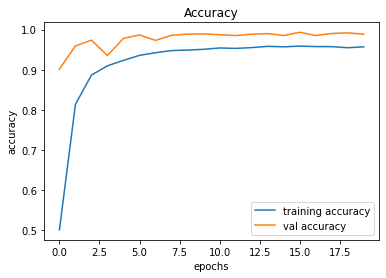

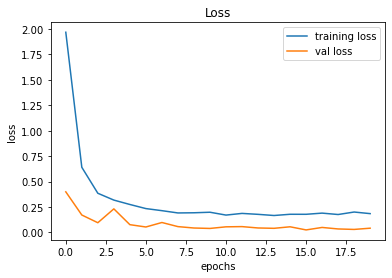

In [63]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testando a accurancy

In [65]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)

model.save('traffic_classifier.h5')

395/395 [==============================] - 3s 6ms/step
